In [2]:
#importation de package
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter

import numpy as np
import matplotlib.pyplot as plt

In [3]:
with MPRester("RPlDkSQDkfldGfeTdTo") as m:

# Bandstructure for material id
    bs = m.get_bandstructure_by_material_id("mp-6980")

### Bande interdite du ScCuS2

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

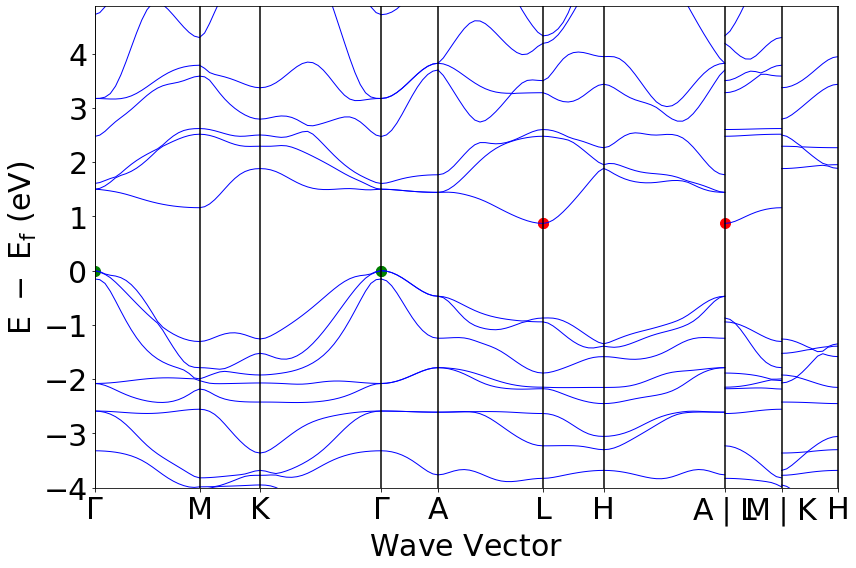

In [4]:
plot = BSPlotter(bs)
plot.get_plot(vbm_cbm_marker=True)

In [5]:
bi = bs.get_band_gap()

print('La bande interdite = ', bi.get('energy'),' eV')

La bande interdite =  0.8709999999999996  eV


In [6]:
#max de la bande de valence
vbm = bs.get_vbm()
print('---------- vbm ----------')
print(vbm.get('band_index'))
print('Les bandes 18 et 19 contiennent la plus grande énergie de la bande de valence')
print('')

#max de la bande de conduction
cbm = bs.get_cbm()
print('---------- cbm ----------')
print(cbm.get('band_index'))
print('La 20e bande contient la plus basse énergie de la bande de conduction')

---------- vbm ----------
defaultdict(<class 'list'>, {<Spin.up: 1>: [18, 19]})
Les bandes 18 et 19 contiennent la plus grande énergie de la bande de valence

---------- cbm ----------
defaultdict(<class 'list'>, {<Spin.up: 1>: [20]})
La 20e bande contient la plus basse énergie de la bande de conduction


### Direction de dispersion

In [7]:
data = plot.bs_plot_data()
x = data.get('ticks').get('distance')
y = data.get('energy')

In [8]:
x_ord = np.array([x[0], x[1], x[3], x[5], x[7], x[9], x[11], x[13], x[14], x[15]])

In [9]:
#Distance entre chaque point
dx = x_ord[1:] - x_ord[0:-1]

# Pour la dernière bande de valence (n°19), on calcul la pente entre chaque branche :
ValSlope = np.zeros(np.shape(dx))
for i in range(np.size(dx)):
    ValSlope[i] = ((y[i].get('1')[19][-1]) - (y[i].get('1')[19][0]))/dx[i]

# Pour la première bande de conduction (n°20), on calcul la pente entre chaque branche :
ConduSlope = np.zeros(np.shape(dx))
for i in range(np.size(dx)):
    ConduSlope[i] = ((y[i].get('1')[20][-1]) - (y[i].get('1')[20][0]))/dx[i]

In [10]:
#Pente maximum
MaxVal = np.max(np.abs(ValSlope))
MaxCondu = np.max(np.abs(ConduSlope))
#Pente minimum
MinVal = np.min(np.abs(ValSlope))
MinCondu = np.min(np.abs(ConduSlope))

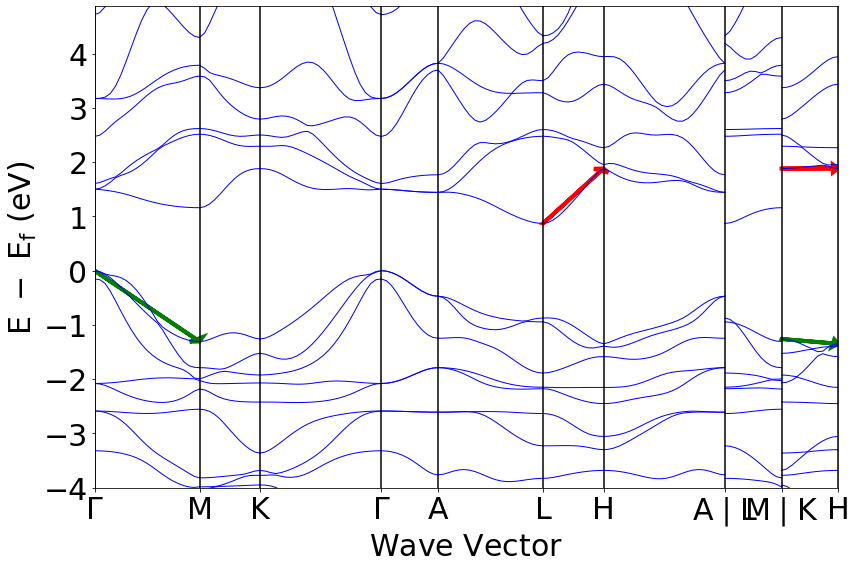

In [11]:
plot.get_plot()
#Flèche représentant la pente maximum de la dernière bande de valence
plt.arrow(x[0],(y[0].get('1')[19][0]),dx[0],(y[0].get('1')[19][-1]) - (y[0].get('1')[19][0]), color='g', head_width=0.15, head_length=0.05, linewidth=4, length_includes_head=True)
#Flèche représentant la pente minimum de la dernière bande de valence
plt.arrow(x[14],(y[8].get('1')[19][0]),dx[8],(y[8].get('1')[19][-1]) - (y[8].get('1')[19][0]), color='g', head_width=0.15, head_length=0.05, linewidth=4, length_includes_head=True)
#Flèche représentant la pente maximum de la première bande de conduction
plt.arrow(x[10],(y[5].get('1')[20][0]),dx[5],(y[5].get('1')[20][-1]) - (y[5].get('1')[20][0]), color='r', head_width=0.15, head_length=0.05, linewidth=4, length_includes_head=True)
#Flèche représentant la pente minimum de la prmière bande de conduction
plt.arrow(x[14],(y[8].get('1')[20][0]),dx[8],(y[8].get('1')[20][-1]) - (y[8].get('1')[20][0]), color='r', head_width=0.15, head_length=0.05, linewidth=4, length_includes_head=True)
plt.show()

In [12]:
print("La dernière bande de valence :")
print("présente le plus de dispertion dans la branche: \u0393 - M, ", 'valeur absolue de la pente =', MaxVal)
print("présente le moins de dispertion dans la branche: M|K - H, ", 'valeur absolue de la pente =', MinVal)
print(" ")
print("La première bande de conduction :")
print("présente le plus de dispertion dans la branche: L - H, ", 'valeur absolue de la pente =', MaxCondu)
print("présente le moins de dispertion dans la branche: M|K - H, ", 'valeur absolue de la pente =', MinCondu)

La dernière bande de valence :
présente le plus de dispertion dans la branche: Γ - M,  valeur absolue de la pente = 1.3500447673214633
présente le moins de dispertion dans la branche: M|K - H,  valeur absolue de la pente = 0.08399850108195635
 
La première bande de conduction :
présente le plus de dispertion dans la branche: L - H,  valeur absolue de la pente = 1.816624299518727
présente le moins de dispertion dans la branche: M|K - H,  valeur absolue de la pente = 0.006892027957620993


### Masse effective